In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import LSTM
from keras import optimizers as opt

import mbspbs10pc.model as mbs_model
from mbspbs10pc import read_activations, utils
reload(read_activations);

# Load data

In [26]:
labelsfile = '../../tmp/1_METONLY_vs_METX/matched_CEM_table.csv'
datafile = '../../tmp/item_days_raw_data_.pkl'
dataset = utils.load_data_labels(datafile, labelsfile)
padded_mbs_seq, padded_timestamp_seq, _ = utils.tokenize(dataset)
maxlen = padded_mbs_seq.shape[1]

# Split in training, validation, test sets
tr_set, v_set, ts_set = utils.train_validation_test_split(
    [padded_mbs_seq, padded_timestamp_seq], dataset['Class'],
    test_size=0.4, validation_size=0.1,
    verbose=False)

# Load model

In [27]:
model = mbs_model.build_model(mbs_input_shape=(maxlen,),
                              timestamp_input_shape=(maxlen, 1),
                              vocabulary_size=2773,
                              embedding_size=300,
                              recurrent_units=64,
                              dense_units=128,
                              bidirectional=True,
                              LSTMLayer=LSTM)

model.compile(optimizer=opt.RMSprop(lr=0.01),
              loss='binary_crossentropy',
              metrics=['acc'])
model.load_weights('../../tmp/auc_861/output_weights.h5')

# Visualize the attention weights

In [87]:
a = read_activations.get_activations(model, ts_set[0], print_shape_only=True, layer_name='tsg_attention')[0]

----- activations -----
(4698, 445, 128)


In [77]:
avg_a = np.mean(a, axis=-1).squeeze()
print(avg_a.shape)

(6341, 445)


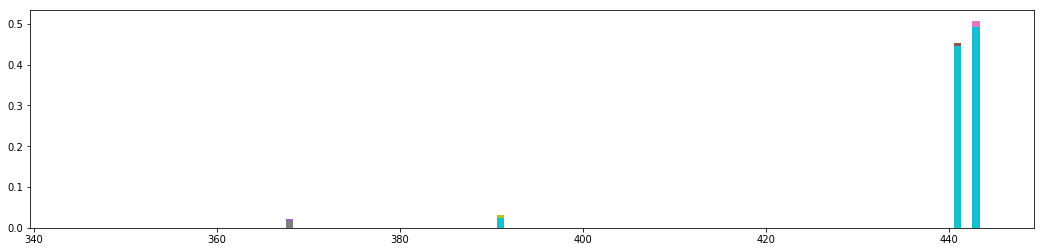

In [78]:
xaxis = np.arange(avg_a.shape[1])[-100:]

plt.figure(figsize=(18,4))
for i in np.random.randint(0, avg_a.shape[0]+1, size=30):
    plt.bar(xaxis, avg_a[i, -100:], label=str(i))
# plt.legend(loc='best')

In [ ]:
plt.figure(figsize=(10, 12))
plt.imshow(a[1, 300:, :])
plt.xlabel('hidden units')
plt.ylabel('mbs sequence')

Text(0,0.5,u'mbs sequence')

Text(0,0.5,u'mbs sequence')

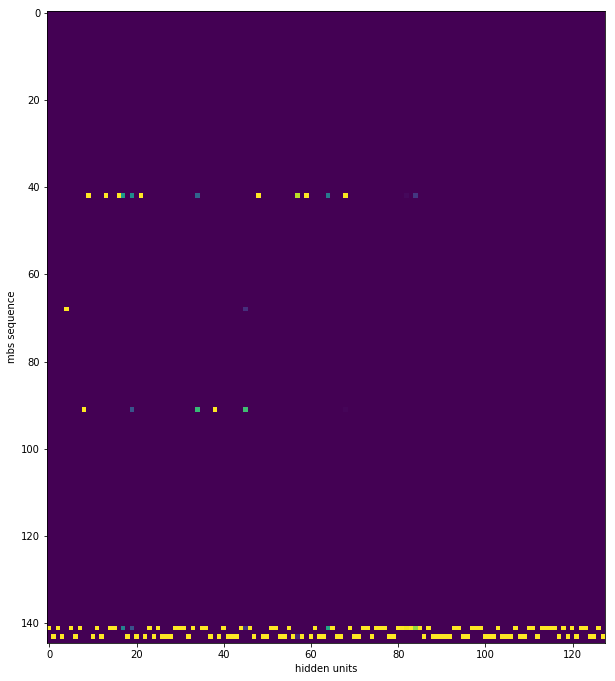

In [86]:
plt.figure(figsize=(10, 12))
plt.imshow(a[2, 300:, :])
plt.xlabel('hidden units')
plt.ylabel('mbs sequence')